In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
GOOGLE_COLAB = True

In [0]:
%load_ext autoreload
%autoreload 2

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import random

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
# from nltk import download
# from nltk.tokenize import RegexpTokenizer
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# from nltk.corpus import wordnet
# from nltk.stem.wordnet import WordNetLemmatizer
# from nltk import pos_tag

In [0]:
import sys
if GOOGLE_COLAB:
    sys.path.append('drive/My Drive/yelp_sentiment_analysis')
else:
    sys.path.append('../')

from yelpsent import data
from yelpsent import features
from yelpsent import metrics
from yelpsent import visualization
from yelpsent import models

# Load Dataset

In [0]:
if GOOGLE_COLAB:
    data_train, data_test = data.load_dataset("drive/My Drive/yelp_sentiment_analysis/data/yelp_train.json",
                                              "drive/My Drive/yelp_sentiment_analysis/data/yelp_test.json")
else:
    data_train, data_test = data.load_dataset("../data/yelp_train.json",
                                              "../data/yelp_test.json")

In [0]:
data_train.head()

,review,sentiment
0,"The food was great and unique, we both loved i...",5
1,"So disappointing, don't know if it's the chang...",2
2,"Nice staff and good food, but seems like an un...",3
3,Average Joe's is definitely not average at all...,5
4,"Everything about this place is perfectly fine,...",2


In [0]:
data_train.describe()

,sentiment
count,271915.000000
mean,3.625935
std,1.263561
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [0]:
data_test.head()

,review,sentiment
0,Dropped by on a week night because I was reall...,4
1,"4 of us waited 30 mins for the coffee, got up ...",1
2,Twenty-two dollars for two people for a lunch ...,4
3,I love this place! Great location in the heart...,5
4,I walked an hour across town to get here becau...,5


In [0]:
data_test.describe()

,sentiment
count,90639.000000
mean,3.624091
std,1.263476
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [0]:
X_train = data_train['review'].tolist()
y_train = data_train['sentiment'].tolist()

In [0]:
X_test = data_test['review'].tolist()
y_test = data_test['sentiment'].tolist()

# Baseline

Naive Bayes with default parameters
- 270k training data, 90k testing data
- Imbalanced class ratios: 9%, 10%, 18%, 33%, 30%

Classification Report - Training
              precision    recall  f1-score   support

           1     0.6259    0.6942    0.6583     25559
           2     0.5014    0.4265    0.4609     28269
           3     0.5521    0.5441    0.5481     48787
           4     0.6233    0.6075    0.6153     89012
           5     0.7016    0.7400    0.7203     80288

    accuracy                         0.6246    271915
   macro avg     0.6009    0.6025    0.6006    271915
weighted avg     0.6212    0.6246    0.6222    271915

Classification Report - Testing
              precision    recall  f1-score   support

           1     0.6001    0.6581    0.6278      8611
           2     0.3985    0.3311    0.3617      9251
           3     0.4687    0.4537    0.4611     16367
           4     0.5549    0.5488    0.5518     29780
           5     0.6609    0.7001    0.6799     26630

    accuracy                         0.5643     90639
   macro avg     0.5366    0.5384    0.5365     90639
weighted avg

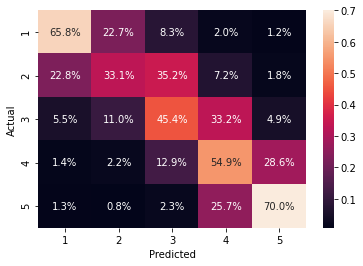

In [0]:
models.train_and_test(X_train=X_train,
                      y_train=y_train,
                      X_test=X_test,
                      y_test=y_test,
                      vectorizer=CountVectorizer(),
                      classifier=MultinomialNB())

# 1 - Training Data Size

***Test - Training Data Size = 1000


Classification Report - Training
              precision    recall  f1-score   support

           1     0.9875    0.8404    0.9080        94
           2     1.0000    0.7885    0.8817       104
           3     0.9162    0.9162    0.9162       179
           4     0.8484    0.9755    0.9075       327
           5     0.9574    0.9153    0.9359       295

    accuracy                         0.9149       999
   macro avg     0.9419    0.8872    0.9099       999
weighted avg     0.9216    0.9149    0.9148       999

Classification Report - Testing
              precision    recall  f1-score   support

           1     0.7840    0.2382    0.3654      8611
           2     0.2972    0.0638    0.1050      9251
           3     0.2982    0.1538    0.2029     16367
           4     0.3860    0.7710    0.5144     29780
           5     0.5701    0.3877    0.4616     26630

    accuracy                         0.4241     90639
   macro avg     0.4671    0

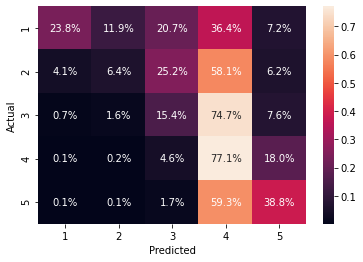

***Test - Training Data Size = 60000


Classification Report - Training
              precision    recall  f1-score   support

           1     0.6909    0.7273    0.7086      5640
           2     0.6458    0.4872    0.5554      6238
           3     0.6311    0.6076    0.6191     10765
           4     0.6666    0.7040    0.6848     19641
           5     0.7483    0.7708    0.7594     17716

    accuracy                         0.6861     60000
   macro avg     0.6765    0.6594    0.6655     60000
weighted avg     0.6845    0.6861    0.6838     60000

Classification Report - Testing
              precision    recall  f1-score   support

           1     0.6186    0.6412    0.6297      8611
           2     0.3990    0.2703    0.3223      9251
           3     0.4526    0.4296    0.4408     16367
           4     0.5331    0.5881    0.5593     29780
           5     0.6586    0.6693    0.6639     26630

    accuracy                         0.5559     90639
   macro avg     0.5324    

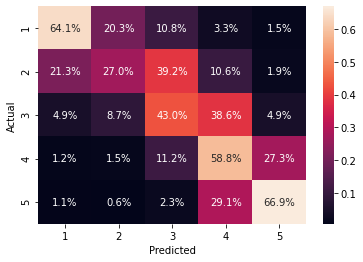

***Test - Training Data Size = 130000


Classification Report - Training
              precision    recall  f1-score   support

           1     0.6459    0.7049    0.6741     12220
           2     0.5550    0.4418    0.4920     13515
           3     0.5814    0.5718    0.5765     23325
           4     0.6390    0.6510    0.6449     42556
           5     0.7224    0.7454    0.7337     38385

    accuracy                         0.6480    130001
   macro avg     0.6287    0.6230    0.6242    130001
weighted avg     0.6452    0.6480    0.6457    130001

Classification Report - Testing
              precision    recall  f1-score   support

           1     0.6053    0.6534    0.6284      8611
           2     0.3997    0.3025    0.3443      9251
           3     0.4646    0.4428    0.4535     16367
           4     0.5469    0.5721    0.5592     29780
           5     0.6616    0.6854    0.6733     26630

    accuracy                         0.5623     90639
   macro avg     0.5356   

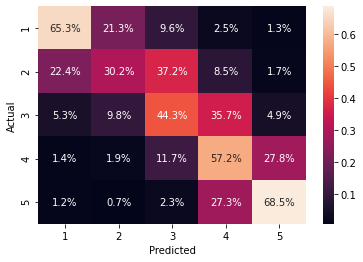

***Test - Training Data Size = 200000


Classification Report - Training
              precision    recall  f1-score   support

           1     0.6350    0.7003    0.6660     18799
           2     0.5264    0.4371    0.4776     20793
           3     0.5635    0.5552    0.5593     35884
           4     0.6295    0.6198    0.6246     65470
           5     0.7060    0.7434    0.7242     59054

    accuracy                         0.6333    200000
   macro avg     0.6121    0.6112    0.6104    200000
weighted avg     0.6300    0.6333    0.6309    200000

Classification Report - Testing
              precision    recall  f1-score   support

           1     0.6023    0.6571    0.6285      8611
           2     0.4025    0.3223    0.3580      9251
           3     0.4666    0.4499    0.4581     16367
           4     0.5527    0.5558    0.5542     29780
           5     0.6609    0.6976    0.6788     26630

    accuracy                         0.5641     90639
   macro avg     0.5370   

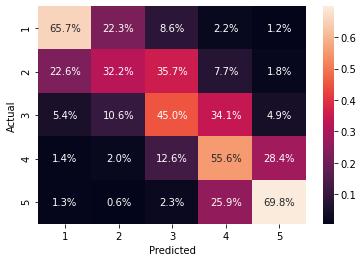

In [0]:
for k in [1*10**3, 60*10**3, 130*10**3, 200*10**3]:
  print("***Test - Training Data Size = {k}\n\n".format(k=k))
  data_train_sample = data.sample_dataset(data=data_train,
                                          k=k,
                                          balance=False)
  X_train_sample = data_train_sample['review'].tolist()
  y_train_sample = data_train_sample['sentiment'].tolist()
  models.train_and_test(X_train=X_train_sample,
                        y_train=y_train_sample,
                        X_test=X_test,
                        y_test=y_test,
                        vectorizer=CountVectorizer(),
                        classifier=MultinomialNB())

# 2 - Class Ratio

***Test - Class Ratio Balance = False


Classification Report - Training
              precision    recall  f1-score   support

           1     0.6478    0.7031    0.6743     11750
           2     0.5574    0.4467    0.4960     12995
           3     0.5851    0.5745    0.5798     22428
           4     0.6418    0.6515    0.6466     40919
           5     0.7202    0.7469    0.7333     36909

    accuracy                         0.6494    125001
   macro avg     0.6305    0.6245    0.6260    125001
weighted avg     0.6466    0.6494    0.6471    125001

Classification Report - Testing
              precision    recall  f1-score   support

           1     0.6027    0.6536    0.6271      8611
           2     0.4026    0.3065    0.3480      9251
           3     0.4656    0.4441    0.4546     16367
           4     0.5471    0.5692    0.5579     29780
           5     0.6610    0.6867    0.6736     26630

    accuracy                         0.5623     90639
   macro avg     0.5358   

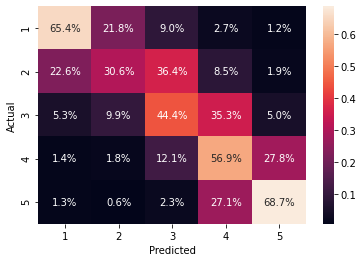

***Test - Class Ratio Balance = True


Classification Report - Training
              precision    recall  f1-score   support

           1     0.6994    0.7140    0.7066     25000
           2     0.5541    0.5245    0.5389     25000
           3     0.5682    0.6036    0.5854     25000
           4     0.6161    0.5791    0.5970     25000
           5     0.7333    0.7554    0.7442     25000

    accuracy                         0.6353    125000
   macro avg     0.6342    0.6353    0.6344    125000
weighted avg     0.6342    0.6353    0.6344    125000

Classification Report - Testing
              precision    recall  f1-score   support

           1     0.5691    0.6763    0.6181      8611
           2     0.3561    0.4209    0.3858      9251
           3     0.4388    0.4908    0.4634     16367
           4     0.5709    0.4558    0.5069     29780
           5     0.6625    0.6814    0.6718     26630

    accuracy                         0.5458     90639
   macro avg     0.5195    

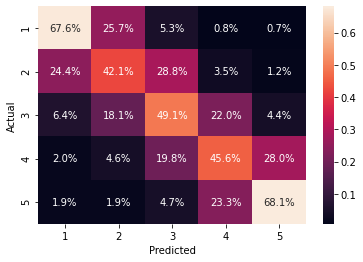

In [0]:
for balance in [False, True]:
  print("***Test - Class Ratio Balance = {balance}\n\n".format(balance=balance))
  data_train_sample = data.sample_dataset(data=data_train,
                                          k=25000*5,
                                          balance=balance)
  X_train_sample = data_train_sample['review'].tolist()
  y_train_sample = data_train_sample['sentiment'].tolist()
  models.train_and_test(X_train=X_train_sample,
                        y_train=y_train_sample,
                        X_test=X_test,
                        y_test=y_test,
                        vectorizer=CountVectorizer(),
                        classifier=MultinomialNB())

# Conclusion

We should
- Entire dataset
- Unbalanced